In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("NYPD_Complaint_Data_Historic.csv", low_memory=False)


In [2]:
df.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   101109527   12/31/2015     23:45:00          NaN          NaN  12/31/2015   
1   153401121   12/31/2015     23:36:00          NaN          NaN  12/31/2015   
2   569369778   12/31/2015     23:30:00          NaN          NaN  12/31/2015   
3   968417082   12/31/2015     23:30:00          NaN          NaN  12/31/2015   
4   641637920   12/31/2015     23:25:00   12/31/2015     23:30:00  12/31/2015   

   KY_CD                        OFNS_DESC  PD_CD  \
0    113                          FORGERY  729.0   
1    101  MURDER & NON-NEGL. MANSLAUGHTER    NaN   
2    117                  DANGEROUS DRUGS  503.0   
3    344     ASSAULT 3 & RELATED OFFENSES  101.0   
4    344     ASSAULT 3 & RELATED OFFENSES  101.0   

                          PD_DESC  ... ADDR_PCT_CD LOC_OF_OCCUR_DESC  \
0  FORGERY,ETC.,UNCLASSIFIED-FELO  ...        44.0            INSIDE   
1                             NaN  ...       103.0           OUTSIDE   
2  CONTROLLED SUBSTANCE,INTENT TO  ...        28.0               NaN   
3                       ASSAULT 3  ...       105.0            INSIDE   
4                       ASSAULT 3  ...        13.0          FRONT OF   

     PREM_TYP_DESC PARKS_NM  HADEVELOPT X_COORD_CD Y_COORD_CD   Latitude  \
0   BAR/NIGHT CLUB      NaN         NaN  1007314.0   241257.0  40.828848   
1              NaN      NaN         NaN  1043991.0   193406.0  40.697338   
2            OTHER      NaN         NaN   999463.0   231690.0  40.802607   
3  RESIDENCE-HOUSE      NaN         NaN  1060183.0   177862.0  40.654549   
4            OTHER      NaN         NaN   987606.0   208148.0  40.738002   

   Longitude                        Lat_Lon  
0 -73.916661  (40.828848333, -73.916661142)  
1 -73.784557  (40.697338138, -73.784556739)  
2 -73.945052  (40.802606608, -73.945051911)  
3 -73.726339  (40.654549444, -73.726338791)  
4 -73.987891     (40.7380024, -73.98789129)  

[5 rows x 24 columns]

In [134]:
df['Longitude'].max()

-73.70057651

In [4]:
df = df[~((df['CMPLNT_FR_DT'].isnull()) |(df['CMPLNT_FR_TM'].isnull()))]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048510 entries, 0 to 1048574
Data columns (total 24 columns):
CMPLNT_NUM           1048510 non-null int64
CMPLNT_FR_DT         1048510 non-null object
CMPLNT_FR_TM         1048510 non-null object
CMPLNT_TO_DT         842565 non-null object
CMPLNT_TO_TM         842951 non-null object
RPT_DT               1048510 non-null object
KY_CD                1048510 non-null int64
OFNS_DESC            1045630 non-null object
PD_CD                1047777 non-null float64
PD_DESC              1047777 non-null object
CRM_ATPT_CPTD_CD     1048509 non-null object
LAW_CAT_CD           1048510 non-null object
JURIS_DESC           1048510 non-null object
BORO_NM              1048510 non-null object
ADDR_PCT_CD          1048509 non-null float64
LOC_OF_OCCUR_DESC    830766 non-null object
PREM_TYP_DESC        1043821 non-null object
PARKS_NM             7599 non-null object
HADEVELOPT           51772 non-null object
X_COORD_CD           1016095 non-null fl

In [6]:
def DTTM(dt,tm):
    return dt + ' ' + tm

In [7]:
result = []
for dt, tm in zip(df['CMPLNT_FR_DT'], df['CMPLNT_FR_TM']):
    result.append(DTTM(dt,tm))

In [8]:
df['CMPLNT_FR'] = result

In [9]:
import datetime
df['CMPLNT_FR'] = df['CMPLNT_FR'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S'))


In [10]:
df['day_of_week'] = df['CMPLNT_FR'].apply(lambda x: x.isoweekday())
df['hour'] = df['CMPLNT_FR'].apply(lambda x: x.hour)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

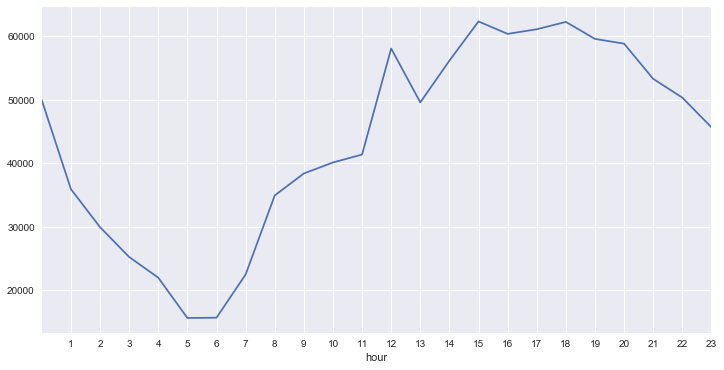

In [12]:
plt.xticks(range(1,25))
df.groupby(['hour']).size().plot(kind="line",figsize=(12,6))

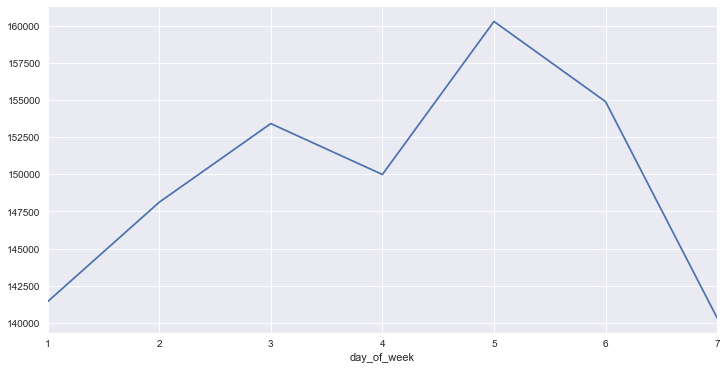

In [13]:
df.groupby(['day_of_week']).size().plot(kind="line",figsize=(12,6))

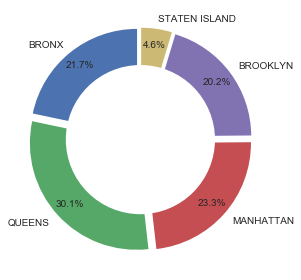

In [14]:
labels = list(df['BORO_NM'].unique())
sizes = df[~df['BORO_NM'].isnull()].groupby(['BORO_NM']).size()
explode = (0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

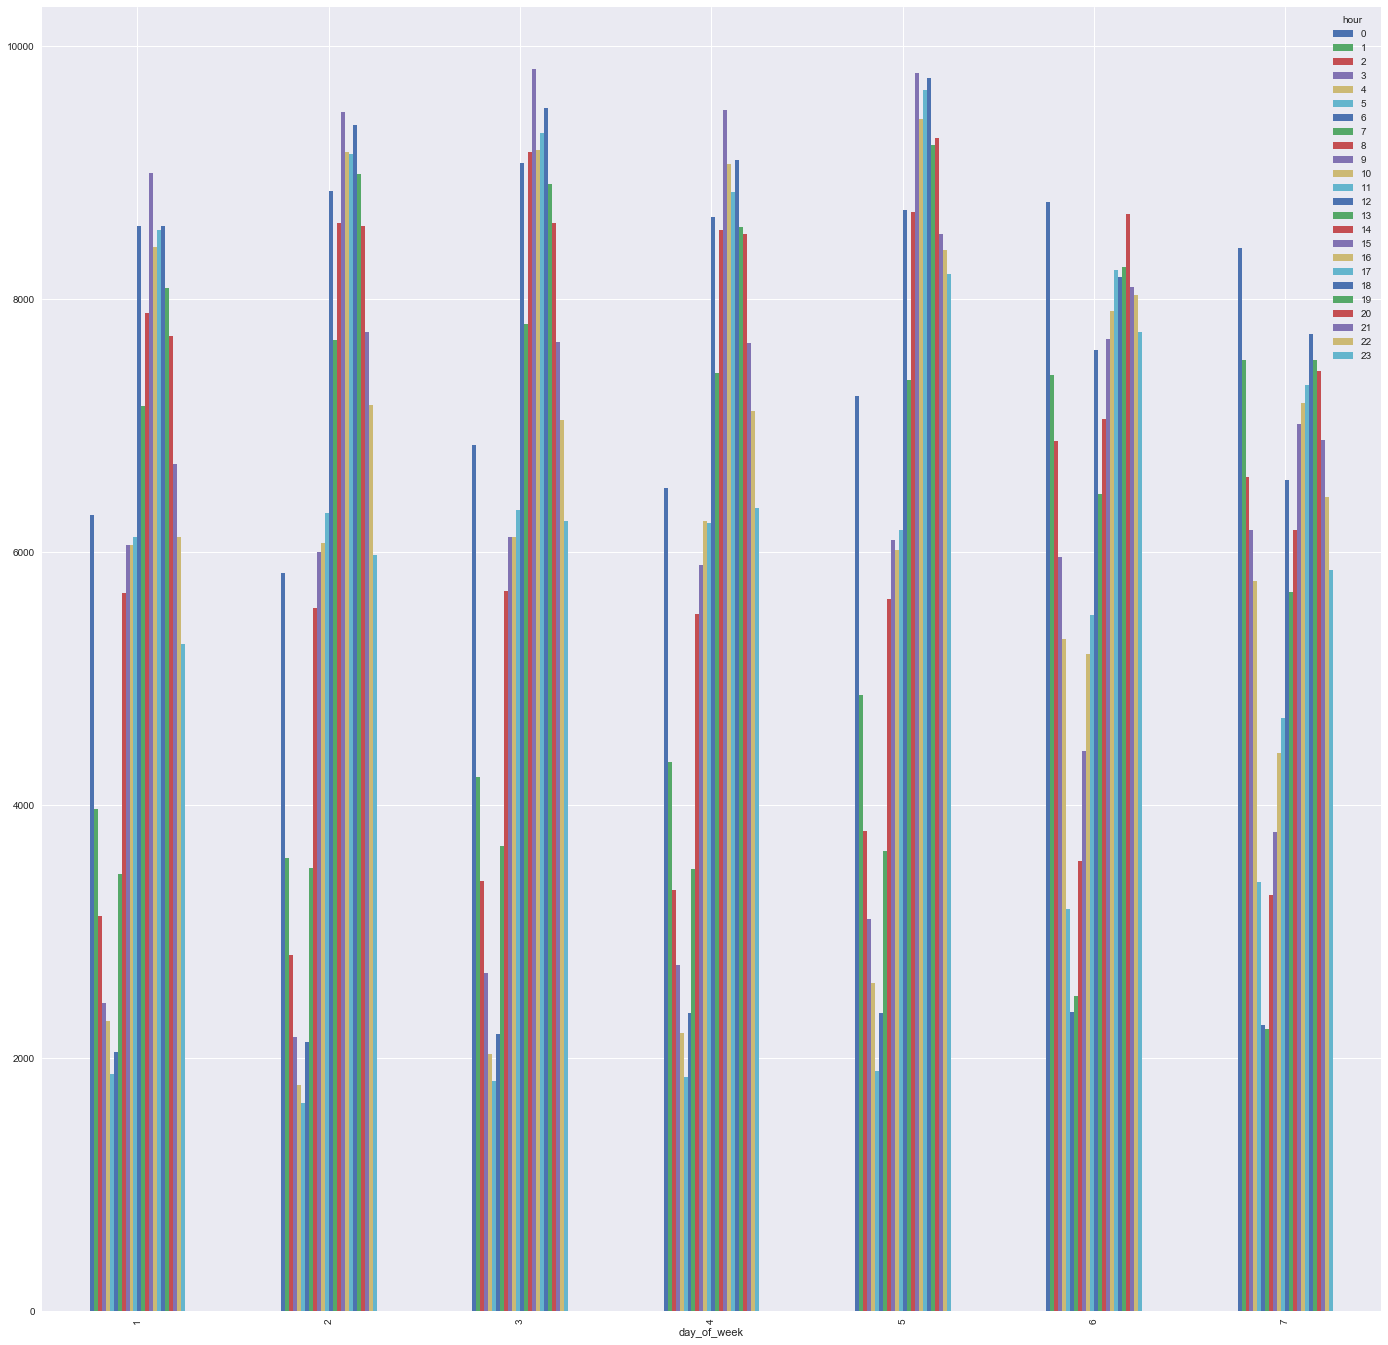

In [15]:
df.groupby(['day_of_week', 'hour']).size().unstack().plot(kind="bar",figsize=(24,24))


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048510 entries, 0 to 1048574
Data columns (total 27 columns):
CMPLNT_NUM           1048510 non-null int64
CMPLNT_FR_DT         1048510 non-null object
CMPLNT_FR_TM         1048510 non-null object
CMPLNT_TO_DT         842565 non-null object
CMPLNT_TO_TM         842951 non-null object
RPT_DT               1048510 non-null object
KY_CD                1048510 non-null int64
OFNS_DESC            1045630 non-null object
PD_CD                1047777 non-null float64
PD_DESC              1047777 non-null object
CRM_ATPT_CPTD_CD     1048509 non-null object
LAW_CAT_CD           1048510 non-null object
JURIS_DESC           1048510 non-null object
BORO_NM              1048510 non-null object
ADDR_PCT_CD          1048509 non-null float64
LOC_OF_OCCUR_DESC    830766 non-null object
PREM_TYP_DESC        1043821 non-null object
PARKS_NM             7599 non-null object
HADEVELOPT           51772 non-null object
X_COORD_CD           1016095 non-null fl

In [144]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    #Your code goes here
    logi = (eastlimit - westlimit) / zone_factor
    lati = (northlimit - southlimit) / zone_factor
    i = 0
    j = 0
    for lat in range(zone_factor):
        westlimit = -74.2635
        j = 0
        for log in range(zone_factor):
            lola = [[westlimit,southlimit],[westlimit+logi,southlimit],[westlimit+logi,southlimit+lati],[westlimit,southlimit+lati],[westlimit,southlimit]]
            zone = ((str(i)+"_"+str(j)),lola)
            zone_table.append(zone)
            j += 1
            westlimit += logi
        southlimit+= lati
        i += 1
    return zone_table

In [145]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    #Your code goes here
    for i in range(len(zone_table)):
        subzone = dict()
        subzone["geometry"] = {'coordinates': [zone_table[i][1]], 'type': 'Polygon'}
        subzone["properties"] = {'zone_id': zone_table[i][0]}
        subzone["type"] = 'Feature'
        zone_data_dict_features.append(subzone)   
    
    return zone_data_dict

In [146]:
zone_table = createZoneTable(30)

In [147]:
def get_zone(lat,lon,zone_table):
    
    #Your code goes here
    for i in range(len(zone_table)):
        while (lon > zone_table[i][1][0][0]) & (lon < zone_table[i][1][1][0]) & (lat > zone_table[i][1][1][1]) & (lat < zone_table[i][1][2][1]):
            return zone_table[i][0]
            break

In [148]:
df['zone'] = df.apply(lambda x:get_zone(x["Latitude"],x["Longitude"],zone_table),axis=1)



In [149]:
zones = df[~df['zone'].isnull()].groupby('zone')
counts = pd.DataFrame(zones.size())
counts.rename(columns={0:"counts"},inplace=True)
counts.reset_index(level=0,inplace=True)

In [150]:
counts.head()

zone  counts
0    0_1      52
1  10_10    1361
2  10_14    2749
3  10_15    3196
4  10_16    1270

In [151]:
import folium
new_map = folium.Map(location = [40.4856, -74.2635],zoom_start=10)
new_map.choropleth(geo_data=createGeoJsonObject(zone_table), data=counts,
             columns=['zone','counts'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Client')

In [152]:
new_map

In [17]:
df['BORO_NM'] = df['BORO_NM'].apply(lambda x:x.upper())

In [38]:
sizes = pd.DataFrame(df.groupby('BORO_NM').size())
sizes.rename(columns={0:"size"},inplace=True)
sizes.reset_index(level=0, inplace=True)
sizes.rename(columns={'BORO_NM':"Borough"},inplace=True)

In [39]:
sizes

Borough    size
0          BRONX  227465
1       BROOKLYN  315630
2      MANHATTAN  244733
3         QUEENS  211942
4  STATEN ISLAND   48740

In [40]:
pop = pd.read_csv("Population_by_Borough_NYC.csv")

In [41]:
pop2010 = pop[['Borough','2010']]

In [42]:
pop2010['Borough'] = pop2010['Borough'].apply(lambda x: x.strip())

/Users/boris/anaconda3/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
pop2010['Borough'] = pop2010['Borough'].apply(lambda x:x.upper())

/Users/boris/anaconda3/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
sizes = sizes.merge(pop2010,how = 'inner', on = 'Borough')

In [48]:
sizes['cpp'] = sizes['size']/sizes['2010']

In [62]:
sizes['Borough'] = sizes['Borough'].apply(lambda x: x.lower().capitalize())

In [64]:
sizes['Borough'][4] = 'Staten Island'

/Users/boris/anaconda3/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
sizes

Borough    size     2010       cpp   size2
0          Bronx  227465  1385108  0.164222  227465
1       Brooklyn  315630  2552911  0.123635  315630
2      Manhattan  244733  1585873  0.154321  244733
3         Queens  211942  2250002  0.094196  211942
4  Staten Island   48740   468730  0.103983   48740

In [106]:
url = "https://raw.githubusercontent.com/dwillis/nyc-maps/master/boroughs.geojson"

In [112]:
import requests

In [114]:
requests.get(url).json()

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'id': 0,
   'properties': {'BoroCode': 5,
    'BoroName': 'Staten Island',
    'Shape_Leng': 330385.03697,
    'Shape_Area': 1623853249.91},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-74.05050806403247, 40.566422034160816],
       [-74.05047137128545, 40.566417387938124],
       [-74.05030321271762, 40.56641746170315],
       [-74.05012587375457, 40.5664058803351],
       [-74.04998352562575, 40.56639592492827],
       [-74.04931640362088, 40.56588774778044],
       [-74.04923629842045, 40.5653627363681],
       [-74.05002620158643, 40.565318180621134],
       [-74.05074409977215, 40.565887125935035],
       [-74.05074768943298, 40.565954076753876],
       [-74.0507322395428, 40.5659921195203],
       [-74.05073571037053, 40.56603277459578],
       [-74.05080326895583, 40.566052200461144],
       [-74.05087333045634

In [115]:
import folium
#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data=requests.get(url).json(), data=sizes,
             columns=['Borough','size'],
             key_on='feature.properties.BoroName',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Crime')
folium.LayerControl().add_to(m)

In [116]:
m